## Water Everywhere: The Development of a Comprehensive Water Quality Monitoring and Prediction System.

# Library Imports

In [1]:
#imports
import pandas as pd 
#pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import pycountry
import re
import json
import numpy as np
import pickle
import warnings
from tqdm.notebook import tqdm


warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

from sklearn.linear_model import Lasso

from geopy.geocoders import Nominatim

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error as mse , mean_absolute_error as mae

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, OneHotEncoder, OrdinalEncoder, Normalizer

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

from sklearn.tree import DecisionTreeRegressor

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_predict

from sklearn.tree import plot_tree

from imblearn.over_sampling import SMOTE

## multiple outputs
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

%matplotlib inline 

In [2]:
#import and save the csv in a readable format
df = pd.read_csv("water.csv")

#displays the dataframe
df

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Potability
0,7.768339,5.136889e-01,21.500638,140.117085,2.971819e-02,4.430943,0.193567,0.063537,NaN,2.846212,269.516517,297.958269,3.119899,3.600000e-05,374.791756,1
1,7.343559,1.720000e-09,16.816792,104.118625,1.060000e-31,1.487122,1.240624,0.620398,1.208432,3.006684,121.857013,323.018648,4.405281,1.100000e-07,53.156448,1
2,8.241575,2.110270e-04,5.955717,130.675245,9.320000e-105,0.320413,0.160953,1.282215,1.098263,4.138922,155.180890,208.373398,3.376656,1.050985e-03,112.208950,1
3,7.114168,1.544037e+00,11.784159,118.955666,1.307060e-04,0.305122,0.008345,0.216062,1.408409,2.383822,440.356623,NaN,2.497958,4.145254e-03,255.496618,1
4,8.319676,5.499565e-01,2.364470,115.193736,1.020000e-43,0.865224,0.051299,1.698124,0.265379,3.227538,180.866615,885.746443,3.468958,6.246690e-04,499.871474,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349435,8.641442,5.008222e-02,6.115014,280.701488,2.370000e-61,0.098533,NaN,0.425296,0.390679,2.574837,89.313537,215.495701,4.700168,6.450000e-06,138.356902,1
349436,6.701122,4.046098e-02,3.113719,143.963356,9.180000e-153,0.094522,0.240734,2.863002,0.939300,0.578618,288.010430,388.293977,3.757733,8.050000e-07,515.855944,1
349437,4.854852,3.760000e-13,2.239909,282.126005,4.370000e-86,7.007872,0.411723,2.264008,0.397009,3.307869,231.472655,552.109495,3.559187,1.207177e+00,170.453584,1
349438,9.397820,2.231319e-02,3.979569,NaN,2.510000e-91,1.395370,4.122429,1.384346,0.654025,0.690906,94.346800,287.885095,3.601551,5.260000e-05,502.961022,1


## Data Preprocessing

In [3]:
#displays the types of data according to columns
df.dtypes

pH                        float64
Iron                      float64
Nitrate                   float64
Chloride                  float64
Lead                      float64
Zinc                      float64
Turbidity                 float64
Fluoride                  float64
Copper                    float64
Odor                      float64
Sulfate                   float64
Conductivity              float64
Chlorine                  float64
Manganese                 float64
Total Dissolved Solids    float64
Potability                  int64
dtype: object

In [4]:
#check for null values
df.isnull().sum()

pH                         5919
Iron                       2100
Nitrate                    5502
Chloride                   9179
Lead                       1417
Zinc                       8128
Turbidity                  2526
Fluoride                   9954
Copper                    10329
Odor                       9302
Sulfate                   10263
Conductivity               8529
Chlorine                   2965
Manganese                  5808
Total Dissolved Solids       89
Potability                    0
dtype: int64

In [5]:
#drop all null values and displays the DF
df.dropna(inplace = True)
df

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Potability
1,7.343559,1.720000e-09,16.816792,104.118625,1.060000e-31,1.487122,1.240624,0.620398,1.208432,3.006684,121.857013,323.018648,4.405281,1.100000e-07,53.156448,1
2,8.241575,2.110270e-04,5.955717,130.675245,9.320000e-105,0.320413,0.160953,1.282215,1.098263,4.138922,155.180890,208.373398,3.376656,1.050985e-03,112.208950,1
4,8.319676,5.499565e-01,2.364470,115.193736,1.020000e-43,0.865224,0.051299,1.698124,0.265379,3.227538,180.866615,885.746443,3.468958,6.246690e-04,499.871474,1
6,5.117557,2.008349e-01,4.615472,157.990081,1.130000e-155,5.025108,0.042885,2.039036,2.782172,3.800836,85.299792,443.223794,2.150967,3.018637e-02,413.063493,1
8,8.092761,1.537558e-01,4.751958,270.421397,3.440000e-08,0.182337,0.176997,0.335344,0.317947,1.184333,129.871695,685.032028,3.429180,4.196730e-03,161.895542,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349433,7.601276,2.318400e+00,3.608223,277.290597,1.400000e-27,0.255884,2.015514,1.853869,0.039601,1.850677,77.682317,543.373149,4.481553,1.663270e-04,56.570911,1
349434,4.752807,8.648079e-03,15.872682,150.413377,1.100000e-22,1.137188,9.613704,0.170088,0.584518,0.555991,421.471965,358.387639,3.167787,2.800000e-11,24.098594,1
349436,6.701122,4.046098e-02,3.113719,143.963356,9.180000e-153,0.094522,0.240734,2.863002,0.939300,0.578618,288.010430,388.293977,3.757733,8.050000e-07,515.855944,1
349437,4.854852,3.760000e-13,2.239909,282.126005,4.370000e-86,7.007872,0.411723,2.264008,0.397009,3.307869,231.472655,552.109495,3.559187,1.207177e+00,170.453584,1


In [6]:
#check for duplicates
df.duplicated().any()

True

In [7]:
#drops all duplicates and display the df
df.drop_duplicates(inplace=True)
df

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Potability
1,7.343559,1.720000e-09,16.816792,104.118625,1.060000e-31,1.487122,1.240624,0.620398,1.208432,3.006684,121.857013,323.018648,4.405281,1.100000e-07,53.156448,1
2,8.241575,2.110270e-04,5.955717,130.675245,9.320000e-105,0.320413,0.160953,1.282215,1.098263,4.138922,155.180890,208.373398,3.376656,1.050985e-03,112.208950,1
4,8.319676,5.499565e-01,2.364470,115.193736,1.020000e-43,0.865224,0.051299,1.698124,0.265379,3.227538,180.866615,885.746443,3.468958,6.246690e-04,499.871474,1
6,5.117557,2.008349e-01,4.615472,157.990081,1.130000e-155,5.025108,0.042885,2.039036,2.782172,3.800836,85.299792,443.223794,2.150967,3.018637e-02,413.063493,1
8,8.092761,1.537558e-01,4.751958,270.421397,3.440000e-08,0.182337,0.176997,0.335344,0.317947,1.184333,129.871695,685.032028,3.429180,4.196730e-03,161.895542,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349431,6.465978,1.175605e+00,5.233496,156.179533,6.200000e-62,1.505991,0.012456,0.037129,0.348002,2.799836,232.442600,273.018299,2.453620,6.580557e-02,149.341847,1
349433,7.601276,2.318400e+00,3.608223,277.290597,1.400000e-27,0.255884,2.015514,1.853869,0.039601,1.850677,77.682317,543.373149,4.481553,1.663270e-04,56.570911,1
349434,4.752807,8.648079e-03,15.872682,150.413377,1.100000e-22,1.137188,9.613704,0.170088,0.584518,0.555991,421.471965,358.387639,3.167787,2.800000e-11,24.098594,1
349437,4.854852,3.760000e-13,2.239909,282.126005,4.370000e-86,7.007872,0.411723,2.264008,0.397009,3.307869,231.472655,552.109495,3.559187,1.207177e+00,170.453584,1


In [8]:
#check for duplicates
df.duplicated().any()

False

In [9]:
# drop the 'odor' column
column_to_drop = 'Odor'

# Drop the 'Odor' column
df.drop(columns=['Odor'], inplace=True)
df

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Potability
1,7.343559,1.720000e-09,16.816792,104.118625,1.060000e-31,1.487122,1.240624,0.620398,1.208432,121.857013,323.018648,4.405281,1.100000e-07,53.156448,1
2,8.241575,2.110270e-04,5.955717,130.675245,9.320000e-105,0.320413,0.160953,1.282215,1.098263,155.180890,208.373398,3.376656,1.050985e-03,112.208950,1
4,8.319676,5.499565e-01,2.364470,115.193736,1.020000e-43,0.865224,0.051299,1.698124,0.265379,180.866615,885.746443,3.468958,6.246690e-04,499.871474,1
6,5.117557,2.008349e-01,4.615472,157.990081,1.130000e-155,5.025108,0.042885,2.039036,2.782172,85.299792,443.223794,2.150967,3.018637e-02,413.063493,1
8,8.092761,1.537558e-01,4.751958,270.421397,3.440000e-08,0.182337,0.176997,0.335344,0.317947,129.871695,685.032028,3.429180,4.196730e-03,161.895542,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349431,6.465978,1.175605e+00,5.233496,156.179533,6.200000e-62,1.505991,0.012456,0.037129,0.348002,232.442600,273.018299,2.453620,6.580557e-02,149.341847,1
349433,7.601276,2.318400e+00,3.608223,277.290597,1.400000e-27,0.255884,2.015514,1.853869,0.039601,77.682317,543.373149,4.481553,1.663270e-04,56.570911,1
349434,4.752807,8.648079e-03,15.872682,150.413377,1.100000e-22,1.137188,9.613704,0.170088,0.584518,421.471965,358.387639,3.167787,2.800000e-11,24.098594,1
349437,4.854852,3.760000e-13,2.239909,282.126005,4.370000e-86,7.007872,0.411723,2.264008,0.397009,231.472655,552.109495,3.559187,1.207177e+00,170.453584,1


Potability
1    137116
0    121279
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x169cd510590>,
 [Text(-0.10573783758610965, 1.09490616479341, '0'),
  Text(0.1066990906550744, -1.1048598572006227, '1')],
 [Text(-0.057675184137877984, 0.597221544432769, '53%'),
  Text(0.05863643720684268, -0.6071752368399818, '47%')])

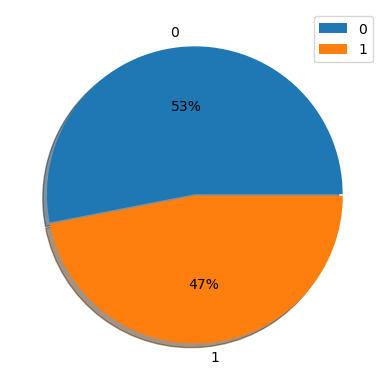

In [10]:
#displays the the unique values proportions of the Potability column

tar = df['Potability'].value_counts()

print(tar)

plt.pie(tar, labels=[0, 1], explode=[0, 0.01], autopct='%.f%%', shadow=True)

plt.legend()

plt.show()


# Remapping the 'Potability' column into '0' and '1' based on WHO potability guidelines

In [11]:
# Remapping the 'Potability' Column into '0' and '1' based on WHO Potability Guidelines

# Define the ranges for each feature
ranges = {
    'Conductivity': [0, 400],
    'Total Dissolved Solids': [0, 1000],
    'Sulfate': [0, 1000],
    'Iron': [0, 0.3],
    'Copper': [0, 2],
    'Sulfate': [0, 250],
    'Chloride': [0, 250],
    'pH': [6.5, 8.5],
    'Nitrate': [0, 50],
    'Lead': [0, 0.1],
    'Fluoride': [0, 1.5],
    'Turbidity': [0, 1000],
    'Chlorine': [0.02, 5],
    'Manganese': [0, 0.08],
    'Zinc': [0, 3],
}

def determine_category(row):
    # This function determines the category of a given row based on specified ranges for each feature.

    # Iterate over each feature in the provided 'ranges' dictionary.
    return int(all(
        # Check if the value of the current feature in the row is within the specified range.
        row[feature] >= ranges[feature][0] and row[feature] <= ranges[feature][1]
        for feature in ranges
    ))

# Apply the function to create the 'Category' column
df['WHO_Potability'] = df.apply(determine_category, axis=1)

# Remap 'Potable' to 0 and 'Non-Potable' to 1
df['WHO_Potability'] = 1 - df['WHO_Potability']

df

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Potability,WHO_Potability
1,7.343559,1.720000e-09,16.816792,104.118625,1.060000e-31,1.487122,1.240624,0.620398,1.208432,121.857013,323.018648,4.405281,1.100000e-07,53.156448,1,0
2,8.241575,2.110270e-04,5.955717,130.675245,9.320000e-105,0.320413,0.160953,1.282215,1.098263,155.180890,208.373398,3.376656,1.050985e-03,112.208950,1,0
4,8.319676,5.499565e-01,2.364470,115.193736,1.020000e-43,0.865224,0.051299,1.698124,0.265379,180.866615,885.746443,3.468958,6.246690e-04,499.871474,1,1
6,5.117557,2.008349e-01,4.615472,157.990081,1.130000e-155,5.025108,0.042885,2.039036,2.782172,85.299792,443.223794,2.150967,3.018637e-02,413.063493,1,1
8,8.092761,1.537558e-01,4.751958,270.421397,3.440000e-08,0.182337,0.176997,0.335344,0.317947,129.871695,685.032028,3.429180,4.196730e-03,161.895542,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349431,6.465978,1.175605e+00,5.233496,156.179533,6.200000e-62,1.505991,0.012456,0.037129,0.348002,232.442600,273.018299,2.453620,6.580557e-02,149.341847,1,1
349433,7.601276,2.318400e+00,3.608223,277.290597,1.400000e-27,0.255884,2.015514,1.853869,0.039601,77.682317,543.373149,4.481553,1.663270e-04,56.570911,1,1
349434,4.752807,8.648079e-03,15.872682,150.413377,1.100000e-22,1.137188,9.613704,0.170088,0.584518,421.471965,358.387639,3.167787,2.800000e-11,24.098594,1,1
349437,4.854852,3.760000e-13,2.239909,282.126005,4.370000e-86,7.007872,0.411723,2.264008,0.397009,231.472655,552.109495,3.559187,1.207177e+00,170.453584,1,1


In [12]:
#check for null values
df.isnull().sum()

pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Lead                      0
Zinc                      0
Turbidity                 0
Fluoride                  0
Copper                    0
Sulfate                   0
Conductivity              0
Chlorine                  0
Manganese                 0
Total Dissolved Solids    0
Potability                0
WHO_Potability            0
dtype: int64

In [13]:
# Display unique values in the "WHO_Potability" column before mapping
print("Unique values in 'WHO_Potability' column after mapping:", df["WHO_Potability"].unique())

Unique values in 'WHO_Potability' column after mapping: [0 1]


In [14]:
#displays the length of unique value "1" in "WHO_Potabiliy" column
len(df[df["WHO_Potability"] ==0])

47731

In [15]:
#displays the length of unique value "1" in "WHO_Potabiliy" column
len(df[df["WHO_Potability"] ==1])

210664

In [16]:
# #Export to csv
#df.to_csv("mapped_df.csv", index=False)

In [17]:
# Drop the initial Potability column
df.drop(columns=['Potability'], inplace=True)
df

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,WHO_Potability
1,7.343559,1.720000e-09,16.816792,104.118625,1.060000e-31,1.487122,1.240624,0.620398,1.208432,121.857013,323.018648,4.405281,1.100000e-07,53.156448,0
2,8.241575,2.110270e-04,5.955717,130.675245,9.320000e-105,0.320413,0.160953,1.282215,1.098263,155.180890,208.373398,3.376656,1.050985e-03,112.208950,0
4,8.319676,5.499565e-01,2.364470,115.193736,1.020000e-43,0.865224,0.051299,1.698124,0.265379,180.866615,885.746443,3.468958,6.246690e-04,499.871474,1
6,5.117557,2.008349e-01,4.615472,157.990081,1.130000e-155,5.025108,0.042885,2.039036,2.782172,85.299792,443.223794,2.150967,3.018637e-02,413.063493,1
8,8.092761,1.537558e-01,4.751958,270.421397,3.440000e-08,0.182337,0.176997,0.335344,0.317947,129.871695,685.032028,3.429180,4.196730e-03,161.895542,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349431,6.465978,1.175605e+00,5.233496,156.179533,6.200000e-62,1.505991,0.012456,0.037129,0.348002,232.442600,273.018299,2.453620,6.580557e-02,149.341847,1
349433,7.601276,2.318400e+00,3.608223,277.290597,1.400000e-27,0.255884,2.015514,1.853869,0.039601,77.682317,543.373149,4.481553,1.663270e-04,56.570911,1
349434,4.752807,8.648079e-03,15.872682,150.413377,1.100000e-22,1.137188,9.613704,0.170088,0.584518,421.471965,358.387639,3.167787,2.800000e-11,24.098594,1
349437,4.854852,3.760000e-13,2.239909,282.126005,4.370000e-86,7.007872,0.411723,2.264008,0.397009,231.472655,552.109495,3.559187,1.207177e+00,170.453584,1


# Correlation Matrix

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

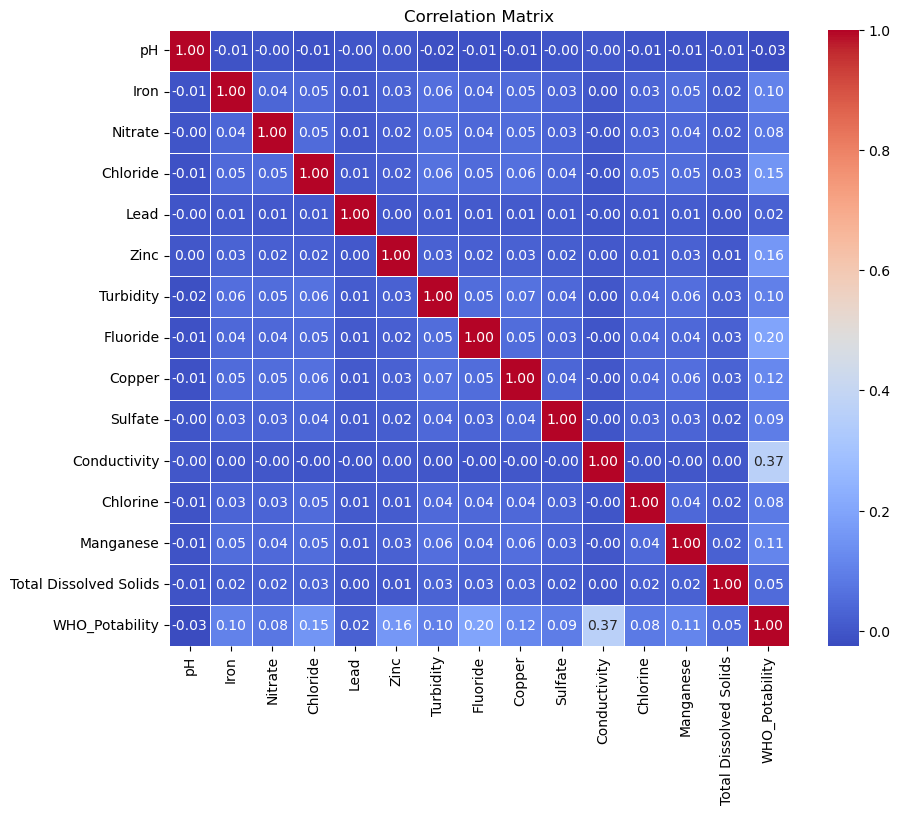

In [18]:
# Correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

# Data Split: Train & Test Sets

In [19]:
# # Split the data into a training set and a test set.
selected_features = ["pH", "Iron", "Nitrate", "Chloride", "Lead", "Zinc", "Turbidity", "Fluoride", "Copper", "Sulfate", "Conductivity", "Chlorine", "Manganese", "Total Dissolved Solids"]

X = df[selected_features]  # Features
y = df["WHO_Potability"]  # Target variable

# Split the data into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets to verify the split
print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Test set shape (X, y):", X_test.shape, y_test.shape)

Training set shape (X, y): (206716, 14) (206716,)
Test set shape (X, y): (51679, 14) (51679,)


# Feature Scaling 

In [20]:
# #Scale the features either by using normalizer or a standard scaler.

#Using  StandardScaler()
scaler = StandardScaler()

# Fit the normalizer on the training data and transform both the training and test sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# #Scale the features either by using normalizer or a standard scaler.

# #Using Normalizer
# normalizer = Normalizer()

# # Fit the normalizer on the training data and transform both the training and test sets
# X_train = normalizer.fit_transform(X_train)
# X_test = normalizer.transform(X_test)

In [21]:
#displays X_train
X_train

array([[ 0.93843425, -0.26111587, -1.43099407, ..., -0.47004842,
        -0.16361226, -0.97012618],
       [-0.19241887, -0.2520715 , -1.42180595, ...,  1.35545589,
        -0.21844575,  0.66854751],
       [ 0.27277284, -0.19366342, -0.81577067, ...,  1.95456249,
        -0.25175665, -1.11707024],
       ...,
       [ 0.18219262, -0.27633389, -0.44091194, ...,  0.63781516,
        -0.25348404, -0.38234392],
       [-0.34783946, -0.27878563, -1.01128243, ...,  2.65653378,
        -0.25348414, -0.7740311 ],
       [ 0.70347371, -0.28079621,  0.81749861, ...,  0.73751544,
        -0.25187975, -1.01795132]])

WHO_Potability
1    210664
0     47731
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x169cd152350>,
 [Text(-0.9199169874976542, 0.6031191723973307, '1'),
  Text(0.9282798976928961, -0.6086020305086621, '0')],
 [Text(-0.5017729022714477, 0.3289740940349076, '82%'),
  Text(0.5101357996330329, -0.3344569717209765, '18%')])

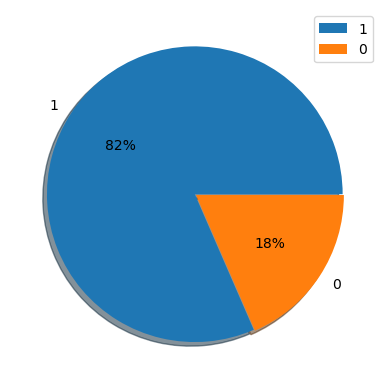

In [22]:
#displays the the unique values of the WHO Water Potability Guidelines proportions
tar = df['WHO_Potability'].value_counts()
print(tar)

plt.pie(tar, labels=[1, 0], explode=[0, 0.01], autopct='%.f%%', shadow=True)
plt.legend()
plt.show()

# Upsampling Using SMOTE (Synthetic Minority Over-sampling Technique)

In [23]:
#Upsampling using SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

#displays the value count of y_train
y_train.value_counts()

WHO_Potability
1    168479
0    168479
Name: count, dtype: int64

# Model: Logistic Regression 

In [24]:
#Fit a logistic Regression model on the training data.
log_model = LogisticRegression()

# Train the logistic regression model using the training data
log_model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train_log = log_model.predict(X_train)

# Make predictions on the test set
y_pred_test_log = log_model.predict(X_test)

# Create a DataFrame to store performance metrics (Accuracy, Precision, Recall) for both training and test sets
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                'Train': [accuracy_score(y_train, y_pred_train_log),
                                          precision_score(y_train, y_pred_train_log),
                                          recall_score(y_train, y_pred_train_log)],
                                'Test': [accuracy_score(y_test, y_pred_test_log),
                                         precision_score(y_test, y_pred_test_log),
                                         recall_score(y_test, y_pred_test_log)]})

# Display the performance metrics DataFrame
display(performance_log)

LogisticRegression()

,Error_metric,Train,Test
0,Accuracy,0.875219,0.851623
1,Precision,0.901036,0.971093
2,Recall,0.843031,0.843333


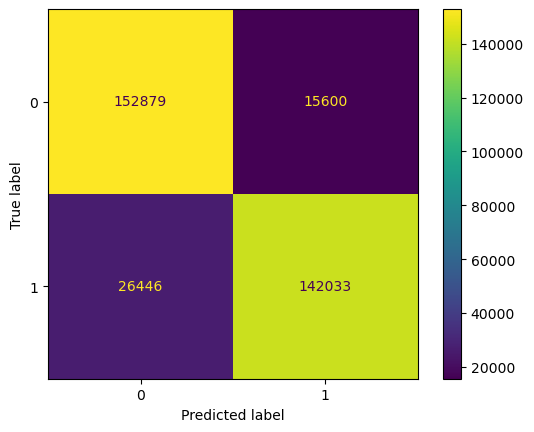

In [25]:
# Import necessary functions/classes from scikit-learn metrics module for confusion matrix and its display
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix for the training set by comparing true labels (y_train) with predicted labels (y_pred_train_log)
# 'labels' parameter is set to log_model.classes_ to ensure proper order of classes in the confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train_log, labels=log_model.classes_)

# Create a ConfusionMatrixDisplay object using the calculated confusion matrix for the training set
disp = ConfusionMatrixDisplay(cm_train)

# Plot the confusion matrix for the training set
disp.plot()

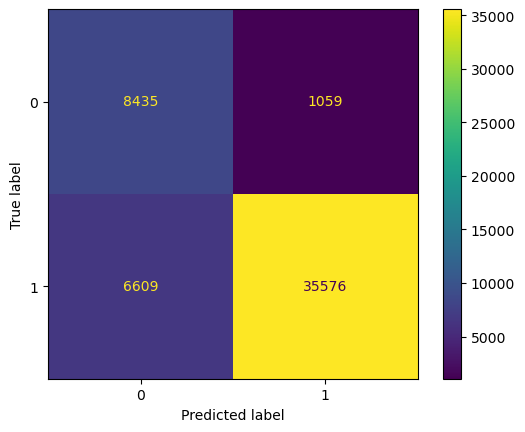

In [26]:
# Import necessary functions/classes from scikit-learn metrics module for confusion matrix and its display
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix for the training set by comparing true labels (y_train) with predicted labels (y_pred_train_log)
# 'labels' parameter is set to log_model.classes_ to ensure proper order of classes in the confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test_log, labels=log_model.classes_)

# Create a ConfusionMatrixDisplay object using the calculated confusion matrix for the training set
disp = ConfusionMatrixDisplay(cm_test)

# Plot the confusion matrix for the training set
disp.plot()

# Model: KNN Classifier

In [27]:
# #Fit a Knn Classifier model on the training data.

# knn_model = KNeighborsClassifier(n_neighbors=5,weights='uniform') # declare we're using knn classification model
# knn_model.fit(X_train, y_train) # train model
# y_pred = knn_model.predict(X_test) # predict test
# y_pred_train = knn_model.predict(X_train) # predict train (for sanity checks)

# performance_KNN = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
#                                'Train': [accuracy_score(y_train, y_pred_train),
#                                          precision_score(y_train, y_pred_train),
#                                          recall_score(y_train, y_pred_train)],
#                                'Test': [accuracy_score(y_test, y_pred),
#                                         precision_score(y_test, y_pred),
#                                         recall_score(y_test, y_pred)]})

# display(performance_KNN)

In [28]:
# # # Save the trained model to a file using pickle
# with open('Cknn_model.pkl', 'wb') as model_file:
#     pickle.dump(knn_model, model_file)

In [29]:
# Load the trained Random Forest Classifier from the pickle file
with open('Cknn_model.pkl', 'rb') as model_file:
    loaded_knn_model = pickle.load(model_file)
loaded_knn_model

KNeighborsClassifier()

In [30]:
# #confusion matrix y_pred_train = loaded_knn_model.predict(X_train) # predict train (for sanity checks)
# cm = confusion_matrix(y_train, y_pred_train, labels= loaded_knn_model.classes_)
# disp = ConfusionMatrixDisplay(cm)
# disp.plot()

In [31]:
# #confusion matrix y_pred_test = loaded_knn_model.predict(X_train) # predict train (for sanity checks)
# cm_t = confusion_matrix(y_test, y_pred, labels= loaded_knn_model.classes_)
# disp = ConfusionMatrixDisplay(cm_t)
# disp.plot()

# Model: Decision Tree Classifier

In [32]:
max_depth_list = [1, 2, 3, 4, 5, 14]

def train_test_decision_tree_recall(X, y, max_depth_list):
    results = {}

    for max_depth in max_depth_list:
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Create and train a Decision Tree Classifier
        dt_model = DecisionTreeClassifier(max_depth=max_depth)
        dt_model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred_train = dt_model.predict(X_train)
        y_pred_test = dt_model.predict(X_test)

        # Calculate metrics and store in results
        dtt_performance_df = pd.DataFrame({'Error_metric': ['Accuracy', 'Precision', 'Recall'],
                                       'Train': [accuracy_score(y_train, y_pred_train),
                                                 precision_score(y_train, y_pred_train),
                                                 recall_score(y_train, y_pred_train)],
                                       'Test': [accuracy_score(y_test, y_pred_test),
                                                precision_score(y_test, y_pred_test),
                                                recall_score(y_test, y_pred_test)]})

        results[max_depth] = dtt_performance_df

    # Concatenate dataframes for all max_depth values
    final_result = pd.concat(results.values(), keys=results.keys())

    return final_result

dtt_performance_df = train_test_decision_tree_recall(X, y, max_depth_list)
dtt_performance_df

Error_metric     Train      Test
1  0     Accuracy  0.815026  0.816289
   1    Precision  0.815026  0.816289
   2       Recall  1.000000  1.000000
2  0     Accuracy  0.815026  0.816289
   1    Precision  0.815026  0.816289
   2       Recall  1.000000  1.000000
3  0     Accuracy  0.857026  0.855454
   1    Precision  0.996604  0.996510
   2       Recall  0.827397  0.825815
4  0     Accuracy  0.904981  0.903849
   1    Precision  0.996829  0.996743
   2       Recall  0.886235  0.885101
5  0     Accuracy  0.937716  0.936822
   1    Precision  0.996966  0.996885
   2       Recall  0.926400  0.925495
14 0     Accuracy  1.000000  0.999923
   1    Precision  1.000000  0.999905
   2       Recall  1.000000  1.000000

# Model: Decision Tree Classifier (max_depth = 14)

In [33]:
#Fit a Decision Tree Classifier on the training data.

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt_model = DecisionTreeClassifier(max_depth=14)

dt_model.fit(X_train, y_train)

y_pred_train_dt = dt_model.predict(X_train)
y_pred_test_dt = dt_model.predict(X_test)


dt_performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(dt_performance_df)

DecisionTreeClassifier(max_depth=14)

,Error_metric,Train,Test
0,Accuracy,1.0,0.999923
1,Precision,1.0,0.999905
2,Recall,1.0,1.000000


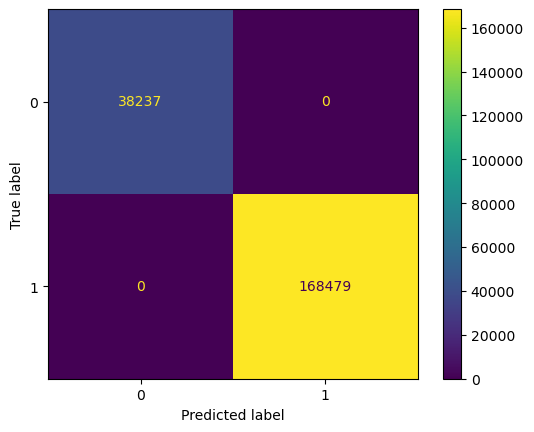

In [34]:
#confusion matrix
cm = confusion_matrix(y_train, y_pred_train_dt, labels= dt_model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

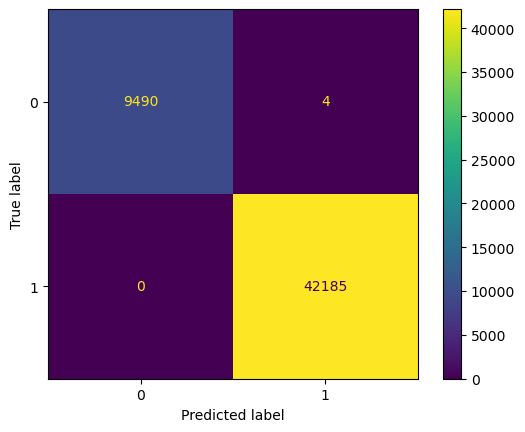

In [35]:
#confusion matrix on ytest
cm = confusion_matrix(y_test, y_pred_test_dt, labels= dt_model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [36]:
dt_performance_df

,Error_metric,Train,Test
0,Accuracy,1.0,0.999923
1,Precision,1.0,0.999905
2,Recall,1.0,1.000000


<Figure size 1000x600 with 0 Axes>

<BarContainer object of 3 artists>

<BarContainer object of 3 artists>

Text(0.5, 0, 'Error Metric')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Training and Test Metrics')

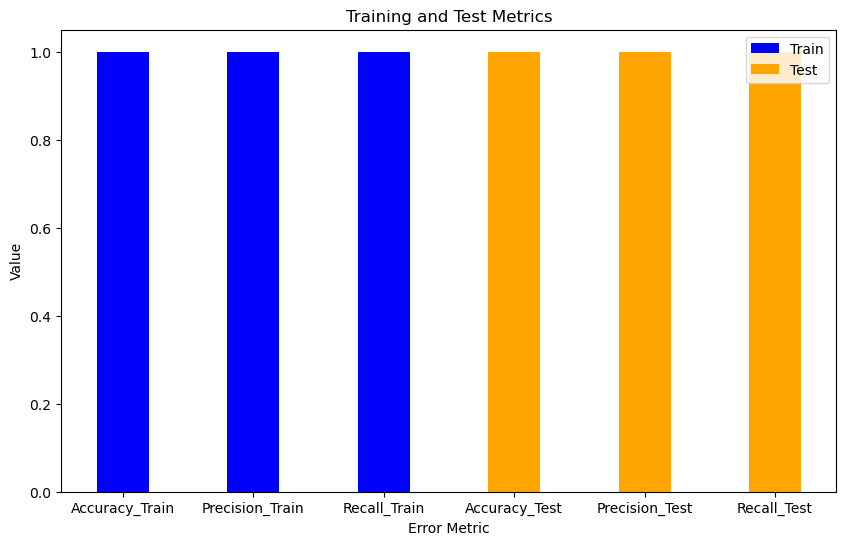

In [37]:
# Create a DataFrame with the given data
data = {
    'Error_metric': ['Accuracy', 'Precision', 'Recall'],
    'Train': [0.999942, 0.999982, 0.999947],
    'Test': [0.999884, 0.999929, 0.999929]
}
dt_performance_df = pd.DataFrame(data)

# Plot the data
plt.figure(figsize=(10, 6))

# Plot Train values
plt.bar(dt_performance_df['Error_metric'] + '_Train', dt_performance_df['Train'], color='blue', width=0.4, label='Train')

# Plot Test values
plt.bar(dt_performance_df['Error_metric'] + '_Test', dt_performance_df['Test'], color='orange', width=0.4, label='Test')

# Add labels and title
plt.xlabel('Error Metric')
plt.ylabel('Value')
plt.title('Training and Test Metrics')
plt.legend()

# Show the plot
plt.show()

# Model: Random forest Classifier

In [38]:
# # fit a Random forest Classifier on the data and compare the accuracy.

# rfc_ops = {"max_depth": 14,               # Maximum depth of the decision trees in the random forest
#            "min_samples_leaf": 20,        # Minimum number of samples required to be at a leaf node 
#            "n_estimators": 100,           # Number of trees in the random forest
#            "bootstrap": True,             # Randomly draw, with replacement, a subset of the original dataset. During the training process, at each node, a random subset of features is considered for splitting.
#            "oob_score": True,             # Use out-of-bag samples to estimate the generalization accuracy
#             "random_state": 42}           # Seed for random number generation for reproducibility 


# # Name the model
# clf = RandomForestClassifier(**rfc_ops)

# # Fit the model
# clf.fit(X_train, y_train)

# y_pred_train_rf = clf.predict(X_train)
# y_pred_test_rf = clf.predict(X_test)


# # # Print accuracy scores
# # train_accuracy = clf.score(X_train, y_train)
# # test_accuracy = clf.score(X_test, y_test)

# # print("Train prediction accuracy score: %.2f" % train_accuracy)
# # print("Test prediction accuracy score: %.2f" % test_accuracy)


# rf_performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
#                                'Train': [accuracy_score(y_train, y_pred_train_rf),
#                                          precision_score(y_train, y_pred_train_rf),
#                                          recall_score(y_train, y_pred_train_rf)],
#                                'Test': [accuracy_score(y_test, y_pred_test_rf),
#                                         precision_score(y_test, y_pred_test_rf),
#                                         recall_score(y_test, y_pred_test_rf)]})

In [39]:
# #confusion matrix on y_train
# cm = confusion_matrix(y_train, y_pred_train_rf, labels= clf.classes_)
# disp = ConfusionMatrixDisplay(cm)
# disp.plot()

In [40]:
# #confusion matrix on y_test
# cm = confusion_matrix(y_test, y_pred_test_rf, labels= clf.classes_)
# disp = ConfusionMatrixDisplay(cm)
# disp.plot()

In [41]:
# # Save the trained model to a file using pickle
# with open('CWHO_random_forest_model.pkl', 'wb') as model_file:
#     pickle.dump(clf, model_file)

In [42]:
# Load the trained Random Forest Classifier from the pickle file
with open('CWHO_random_forest_model.pkl', 'rb') as model_file:
    loaded_WHO_random_forest_model= pickle.load(model_file)
loaded_WHO_random_forest_model

RandomForestClassifier(max_depth=14, min_samples_leaf=20, oob_score=True,
                       random_state=42)

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 3 artists>

<BarContainer object of 3 artists>

Text(0.5, 0, 'Error Metric')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Training and Test Metrics')

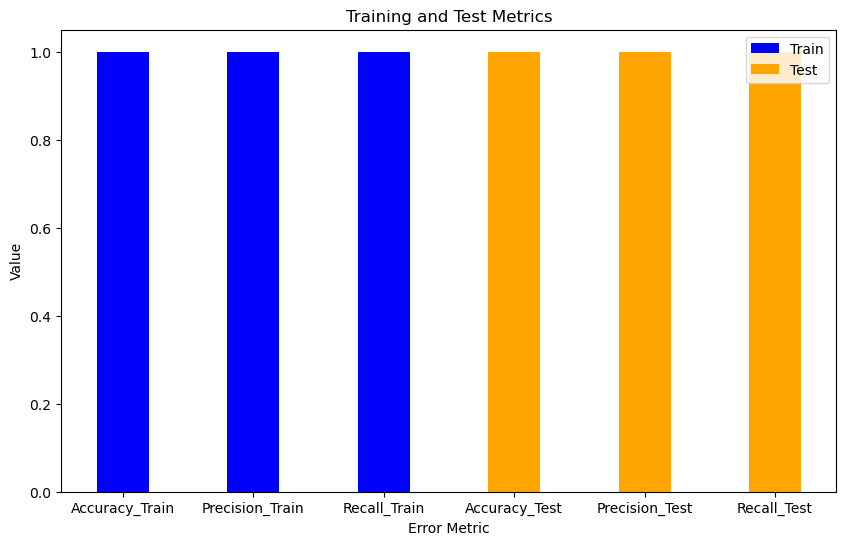

In [43]:
# Create a DataFrame with the given data
data = {
    'Error_metric': ['Accuracy', 'Precision', 'Recall'],
    'Train': [0.999942, 0.999982, 0.999947],
    'Test': [0.999884, 0.999929, 0.999929]
}
rf_performance_df = pd.DataFrame(data)

# Plot the data
plt.figure(figsize=(10, 6))

# Plot Train values
plt.bar(rf_performance_df['Error_metric'] + '_Train', rf_performance_df['Train'], color='blue', width=0.4, label='Train')

# Plot Test values
plt.bar(rf_performance_df['Error_metric'] + '_Test', rf_performance_df['Test'], color='orange', width=0.4, label='Test')

# Add labels and title
plt.xlabel('Error Metric')
plt.ylabel('Value')
plt.title('Training and Test Metrics')
plt.legend()

# Show the plot
plt.show()

# Apply K-fold cross validation on all 4 models to compare performace 

In [44]:
# #name and save the 4 models
# model1 = DecisionTreeClassifier()
# model2 = LogisticRegression(max_iter = 300)
# model3 = KNeighborsClassifier()
# model4 = RandomForestClassifier()

# # Create a list containing the models
# model_pipeline = [model1, model2, model3, model4]


# #Define names for the models for readability
# model_names = ['Classification Tree', 'LogisticRegression','KNN', 'RandomForestClassifier']

# # Create an empty dictionary to store the mean recall scores for each model
# scores = {}

# # Iterate over each model in the pipeline and names and wrap the iterable with tqdm to display the progress bar
# for model, name in tqdm(zip(model_pipeline, model_names)):
#     recall = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring="recall"))
#     accuracy = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy"))
#     precision = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring="precision"))

#     # Store the mean scores in the dictionary with the corresponding model name
#     scores[name] = {'Recall': recall, 'Accuracy': accuracy, 'Precision': precision}

# # Create a DataFrame from the scores dictionary
# scores_df = pd.DataFrame(scores)

# # displays the DataFrame
# scores_df

In [45]:
# # Save the model to a file using pickle

# with open('CWHO_models_and_scores.pkl', 'wb') as file:
#     pickle.dump({'models': model_pipeline, 'scores_df': scores_df}, file)

In [46]:
# Load the pickled file
with open('CWHO_models_and_scores.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

# Access the models and scores_df
loaded_models = loaded_data['models']
loaded_scores_df = loaded_data['scores_df']
loaded_scores_df

,Classification Tree,LogisticRegression,KNN,RandomForestClassifier
Recall,0.999964,0.952386,0.884164,0.999976
Accuracy,0.999923,0.865497,0.809033,0.999918
Precision,0.999941,0.890341,0.881842,0.999899


In [47]:
#transverse the df
loaded_scores_df.T

,Recall,Accuracy,Precision
Classification Tree,0.999964,0.999923,0.999941
LogisticRegression,0.952386,0.865497,0.890341
KNN,0.884164,0.809033,0.881842
RandomForestClassifier,0.999976,0.999918,0.999899


In [48]:
#Calculating the F1 score
models = ['Classification Tree', 'LogisticRegression', 'KNN', 'RandomForestClassifier']
tempdf = loaded_scores_df.T
fscore = []
for model in models:
    recall = tempdf.Recall[model]
    precision = tempdf.Precision[model]
    f_score = 2*(recall*precision)/(recall+precision)
    fscore.append(f_score)
tempdf['F1-Score'] = fscore
loaded_scores_df = tempdf.T
loaded_scores_df.T

,Recall,Accuracy,Precision,F1-Score
Classification Tree,0.999964,0.999923,0.999941,0.999953
LogisticRegression,0.952386,0.865497,0.890341,0.920319
KNN,0.884164,0.809033,0.881842,0.883001
RandomForestClassifier,0.999976,0.999918,0.999899,0.999938


# Performance / Error Metrics Comparison

Text(0.5, 0, 'Models')

Text(0, 0.5, 'Scores')

Text(0.5, 1.0, 'Classification Metrics for Different Models')

[Text(0.3075, 0, 'Decision Tree Classifier'),
 Text(1.3075, 0, 'Logistic Regression'),
 Text(2.3075, 0, 'KNN'),
 Text(3.3075, 0, 'Random Forest Classifier')]

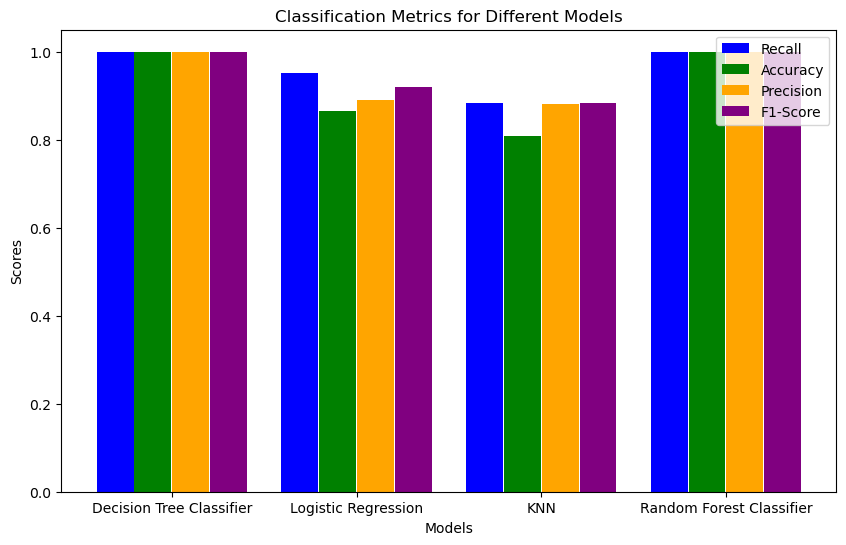

In [49]:
# Performance metrics comparison
models = ['Decision Tree Classifier', 'Logistic Regression', 'KNN', 'Random Forest Classifier']
recall = list(loaded_scores_df.T.Recall)
accuracy = list(loaded_scores_df.T.Accuracy)
precision = list(loaded_scores_df.T.Precision)
f1_score = list(loaded_scores_df.T['F1-Score'])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Adjust bar width and padding between bar groups
bar_width = 0.2
padding_between_bars = 0.005
padding_between_groups = 0.3
index = np.arange(len(models))

bar1 = ax.bar(index, recall, width=bar_width, label='Recall', color='blue')
bar2 = ax.bar(index + bar_width + padding_between_bars, accuracy, width=bar_width, label='Accuracy', color='green')
bar3 = ax.bar(index + 2 * (bar_width + padding_between_bars), precision, width=bar_width, label='Precision', color='orange')
bar4 = ax.bar(index + 3 * (bar_width + padding_between_bars), f1_score, width=bar_width, label='F1-Score', color='purple')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Classification Metrics for Different Models')
ax.set_xticks(index + 1.5 * (bar_width + padding_between_bars))
ax.set_xticklabels(models)
ax.legend()

# Show the plot
plt.show()

## Model Tester

In [50]:
# Function to test model performance
# it generates a DF with potable and non-potable rows and predicts for every row
# rows are generated by randomly taking two rows with the same 'WHO_potability_score' and then randomly taking values in betwewen those in the rows

import random
def color(row):
    if row['WHO_Potability'] == row['Predictions']:
        return ['background-color: green']*len(row)
    else:
        return ['background-color: red']*len(row)

def tester(numberOfTests, model = loaded_WHO_random_forest_model, potable=True, nonPotable=True, df=df):
    # calculates how long the df must be and how many rows are potable / non-potable
    # DF can be generated containing only potable / non potable rows or with a mix of both
    if potable == True and nonPotable == True: 
        tpos = int(numberOfTests/2)
        tneg = numberOfTests - tpos
    elif potable == True and nonPotable == False:
        tpos= numberOfTests
        tneg = 0
    elif potable == False and nonPotanble == True:
        tpos = 0
        tneg = numberOfTests
    else: # Error in case the user sets potable and non-potable to false
        return 'Either potable or nonPotable or both need to be true'
    
     # Check if the sum of positive (tpos) and negative (tneg) is not equal to the total number of tests (numberOfTests).
     
    if tpos + tneg != numberOfTests:
    # If the condition is true, increment the value of true positive (tpos) by 1.
        tpos += 1
    
    # get the column names from the original DF
    columnNames = list(df.keys())
    # generate an empty List, from this the DF will later be build
    testDF_list = []
    
    # Calculates fields for rows with potability of 1
    if tpos > 0:
        # grabs only non-potable rows, resets index
        dfpos = df[df['WHO_Potability'] == 1]
        dfpos = dfpos.reset_index(drop=True)
        # tpos is the number of rows that will be calculated, for each row do...
        for _ in range(0,tpos):
            # create an empty dict
            rowdict = {}
            # grab 2 random rows from the DataFrame 
            row1 = random.randint(0,len(dfpos))
            row2 = random.randint(0,len(dfpos))
            # For each column
            for column in columnNames:
                # get the cells from the 2 random rows
                cell1 = dfpos[column][row1]
                cell2 = dfpos[column][row2]
                # get a new value 
                newVal = random.uniform(cell1,cell2)
                # add value to row Dict
                rowdict[column] = newVal
            # add Dict to testDF List
            testDF_list.append(rowdict)
            
    # repeat everything for potability = 0
    if tneg > 0:
        dfneg = df[df['WHO_Potability'] == 0]
        dfneg = dfneg.reset_index(drop=True)
        
        for _ in range(0,tneg):
            rowdict = {}
            row1 = random.randint(0,len(dfneg))
            row2 = random.randint(0,len(dfneg))
            for column in columnNames:
                cell1 = dfneg[column][row1]
                cell2 = dfneg[column][row2]
                newVal = random.uniform(cell1,cell2)
                rowdict[column] = newVal
            testDF_list.append(rowdict)
    
    # create a DF from the list of Dicts created in the 2 steps above
    newDF = pd.DataFrame(testDF_list)
    # get a list of Column Names without the WHO_Potablility
    columnNamesNonPot = [x for x in columnNames if x!= 'WHO_Potability']
    
    # generate an empty list to store the predictions in
    predictions = []
    # iterate over every row of the new DF
    for row in range(len(newDF)):
        # convert the row into a list, drop potability
        rowList = newDF.loc[row, :].values.tolist()[:-1]
        # generate a new DF from the list, use columnNamesNonPot as column names
        rowDF = pd.DataFrame([rowList], columns=columnNamesNonPot)
        # predict using the chosen model and append the predictions to the list
        predictions.append(model.predict(rowDF)[0])
    
    # add the predictions in a Predictions-Column to the DF 
    newDF['Predictions'] = predictions
    newDF['WHO_Potability'] =  newDF['WHO_Potability'].astype(int)
    styledDF = newDF.style.apply(color,axis=1)
    
    # return results
    return styledDF
    
    
        
    

In [61]:
# availabe models: dt_model, loaded_knn_model, log_model, loaded_WHO_random_forest_model
tester(12)
# alternatively with decision tree model
tester(numberOfTests= 15, model=dt_model)

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,WHO_Potability,Predictions
0,7.569925,0.146480,4.837750,240.924085,0.000000,2.584842,0.194495,1.307612,1.036092,154.603015,424.481489,2.867864,0.009721,140.742611,1,1
1,6.372901,0.215869,4.490440,193.460352,0.000000,1.176054,0.193729,1.303464,0.325310,192.019827,502.652189,3.736404,0.000015,422.056434,1,1
2,7.043511,0.016474,5.290642,310.238448,0.000000,1.644591,0.121028,0.286659,1.202823,106.983596,556.281284,2.594905,0.132811,441.794734,1,1
3,7.726577,0.000046,8.123148,140.825898,0.000000,1.232750,0.395257,3.953490,0.107158,402.124292,755.317963,3.021133,0.022364,294.343750,1,1
4,7.213800,0.075641,9.323228,141.085584,0.000000,1.902519,0.084803,1.160501,0.436868,162.806400,518.725627,2.439977,0.008159,327.178845,1,1
5,6.914526,0.008391,3.054903,256.051885,0.000001,1.164968,2.035374,0.426353,1.393729,212.656138,344.282023,1.866774,0.009418,316.245531,1,1
6,6.797866,0.000000,7.946621,136.757312,0.000000,1.210127,0.078254,0.152964,0.368237,138.000944,246.622697,3.165297,0.002005,571.999443,0,0
7,7.269550,0.028195,4.346176,169.528576,0.000000,1.435757,0.047918,0.373004,0.053632,77.958429,239.753637,2.957174,0.007640,270.031145,0,0
8,7.423069,0.000009,8.806698,146.481140,0.000000,2.242270,0.685738,1.227824,0.238191,117.518503,263.453420,3.040377,0.000003,231.000407,0,0
9,8.033213,0.000001,6.712354,149.383662,0.000000,0.555524,0.117856,0.285314,0.457637,158.151518,357.534543,3.459559,0.011126,204.220256,0,0


,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,WHO_Potability,Predictions
0,6.713595,0.512104,9.604262,194.594520,0.000000,1.384659,0.072620,0.392829,0.623977,210.075392,667.500367,2.158147,0.004923,217.046304,1,1
1,6.785619,0.059628,10.193970,148.975389,0.000000,1.107342,0.763235,1.092678,0.163660,123.113541,463.797164,3.167366,0.003720,400.222118,1,1
2,7.435800,0.002204,7.676961,177.333499,0.000000,1.735029,0.071441,1.129762,0.724479,260.089845,298.886490,4.158983,0.023345,495.474013,1,1
3,8.157511,0.000000,8.539983,585.735575,0.003860,3.077106,0.000946,1.388717,0.181865,105.007073,315.392649,4.314596,0.017028,331.997474,1,1
4,7.217412,0.050411,8.319279,138.249938,0.000232,1.173915,0.109967,1.180924,0.015243,110.380683,701.076073,2.675623,0.005203,279.968871,1,1
5,7.605336,0.155011,8.703940,136.195965,0.420983,1.499790,0.020255,2.719349,0.086207,262.498804,496.080954,3.971314,0.000005,226.674415,1,1
6,5.538928,0.046375,5.162649,274.149497,0.000000,2.677790,0.033124,1.656801,1.193206,84.840154,201.726966,3.583066,0.010896,176.989516,1,1
7,6.870980,0.026534,5.510817,113.451499,0.000000,2.166804,0.439712,0.197097,0.139538,140.979732,213.910553,3.406560,0.000012,197.151097,0,0
8,7.563893,0.000012,4.206698,157.151959,0.000000,2.299523,2.215593,1.161217,0.017049,86.967746,337.093710,3.236449,0.004600,473.517280,0,0
9,7.244250,0.000429,8.002158,127.195223,0.000000,1.351439,0.517299,0.897177,0.630418,156.669249,245.736068,3.030440,0.036877,189.974508,0,0


## User Input Simulation

In [59]:
#user input
model = dt_model #(dt_model, loaded_knn_model, log_model, loaded_WHO_random_forest_model)

def get_float_input(prompt):
    while True:
        try:
            value = float(input(prompt))
            return value
        except ValueError:
            print("Please enter a valid float with two decimal points.")

def is_potable_water(model):
    # Collect user input using get_float_input
    user_input = {}
    print("Enter values for the following parameters:")
    parameters = [
        'pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 
        'Turbidity', 'Fluoride', 'Copper', 'Sulfate', 
        'Conductivity', 'Chlorine', 'Manganese', 'Total Dissolved Solids'
    ]
    for parameter in parameters:
        value = get_float_input(f"{parameter}: ")
        user_input[parameter] = value

    # Use the model to predict potability
    user_input_df = pd.DataFrame([user_input], columns=parameters)
    prediction = model.predict(user_input_df)

    if prediction[0] == 0:
        print("The water is predicted to be potable according to the guidelines of WHO.")
    else:
        print("The water is predicted to be not potable according to the guidelines of WHO.")
    return prediction

# Using the function
result = is_potable_water(model)

Enter values for the following parameters:


KeyboardInterrupt: Interrupted by user

In [53]:
df

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,WHO_Potability
1,7.343559,1.720000e-09,16.816792,104.118625,1.060000e-31,1.487122,1.240624,0.620398,1.208432,121.857013,323.018648,4.405281,1.100000e-07,53.156448,0
2,8.241575,2.110270e-04,5.955717,130.675245,9.320000e-105,0.320413,0.160953,1.282215,1.098263,155.180890,208.373398,3.376656,1.050985e-03,112.208950,0
4,8.319676,5.499565e-01,2.364470,115.193736,1.020000e-43,0.865224,0.051299,1.698124,0.265379,180.866615,885.746443,3.468958,6.246690e-04,499.871474,1
6,5.117557,2.008349e-01,4.615472,157.990081,1.130000e-155,5.025108,0.042885,2.039036,2.782172,85.299792,443.223794,2.150967,3.018637e-02,413.063493,1
8,8.092761,1.537558e-01,4.751958,270.421397,3.440000e-08,0.182337,0.176997,0.335344,0.317947,129.871695,685.032028,3.429180,4.196730e-03,161.895542,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349431,6.465978,1.175605e+00,5.233496,156.179533,6.200000e-62,1.505991,0.012456,0.037129,0.348002,232.442600,273.018299,2.453620,6.580557e-02,149.341847,1
349433,7.601276,2.318400e+00,3.608223,277.290597,1.400000e-27,0.255884,2.015514,1.853869,0.039601,77.682317,543.373149,4.481553,1.663270e-04,56.570911,1
349434,4.752807,8.648079e-03,15.872682,150.413377,1.100000e-22,1.137188,9.613704,0.170088,0.584518,421.471965,358.387639,3.167787,2.800000e-11,24.098594,1
349437,4.854852,3.760000e-13,2.239909,282.126005,4.370000e-86,7.007872,0.411723,2.264008,0.397009,231.472655,552.109495,3.559187,1.207177e+00,170.453584,1
